In [14]:
# Load modules
from pyDOE2 import fullfact
import numpy as np
import pandas as pd

In [15]:
## Create initial design matrix
design = pd.DataFrame(fullfact([10,9,10,9]),columns=['bid1','dam1','bid2','dam2'])

In [16]:
# Keep only choice situations where alt 1 is the 'cheap and damaging' alt, and alt 2 is the 'expensive and corrective' alt
design = design[(design['bid1']<design['bid2']) & (design['dam1']>design['dam2'])]

# Replicate the design 50000 rows
design = design.sample(n=50000,replace=True,ignore_index=True)

In [17]:
# Replace values
design['bid1'] = design['bid1'].copy().replace({0:10,1:30,2:40,3:50,4:60,5:70,6:80,7:90,8:100,9:120})
design['bid2'] = design['bid2'].copy().replace({0:10,1:30,2:40,3:50,4:60,5:70,6:80,7:90,8:100,9:120})

design['dam1'] = (design['dam1'].copy() + 1 )*10
design['dam2'] = (design['dam2'].copy() + 1 )*10

In [18]:
bvtt = (- (design['bid2']-design['bid1']) / (design['dam2']-design['dam1'])).to_numpy()
design['bvtt'] = bvtt

In [20]:
# Set random generator
generator = np.random.default_rng(seed=12345)

In [21]:
# Set 'true' parameter values
mu = 1
vtt = generator.normal(loc=3,scale=0.5,size=int(bvtt.shape[0]/10))
vtt = np.repeat(vtt,10)


e1 = generator.gumbel(size=bvtt.shape[0])
e2 = generator.gumbel(size=bvtt.shape[0])

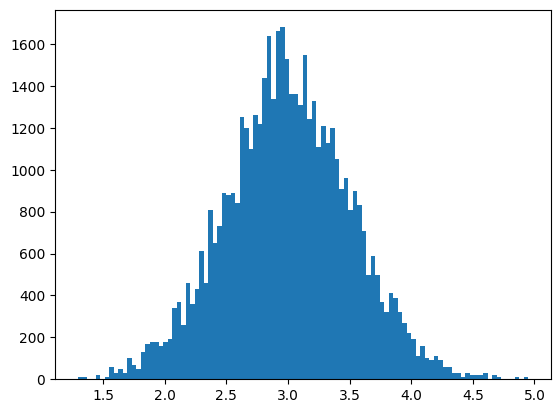

In [22]:
import matplotlib.pyplot as plt
plt.hist(vtt,bins=100)
plt.show()

In [23]:
# Calculate utilities and chosen alternative
V1 = mu * design['bvtt'].to_numpy()
V2 = mu * vtt
U1 = V1 + e1
U2 = V2 + e2

Y = np.c_[U1,U2].argmax(axis=1) + 1

In [24]:
design_1 = design.copy()
design_1['choice'] = Y
design_1['id'] = np.repeat(np.arange(int(design.shape[0])/10)+1,10)
design_1['vtt'] = vtt
design_1.to_csv('../../data/env_synth_normal.csv',index=False)

In [25]:
# Compute log-likelihood and rho-squared
dV = V2 - V1
p = 1/(1+np.exp(-dV))
ll_n = (Y==1) * np.log(1-p) + (Y==2) * np.log(p)
ll = np.sum(ll_n)
r2 = 1 - ll/(len(ll_n)*np.log(0.5))

In [26]:
print(r2)

0.42392958617792953
